In [2]:
import pandas as pd
import semopy as sm
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
lat_lon_list = [(45, 0), (42, 13), (68,25)]

df1 = pd.read_csv(f"/Users/anand/Documents/data/project_3_data/data/lat_{lat_lon_list[0][0]}_lon_{lat_lon_list[0][1]}.csv", index_col = 0)
df2 = pd.read_csv(f"/Users/anand/Documents/data/project_3_data/data/lat_{lat_lon_list[1][0]}_lon_{lat_lon_list[1][1]}.csv", index_col = 0)
df3 = pd.read_csv(f"/Users/anand/Documents/data/project_3_data/data/lat_{lat_lon_list[2][0]}_lon_{lat_lon_list[2][1]}.csv", index_col = 0)


In [3]:
# sns.pairplot(df1)
# plt.savefig(f"/Users/anand/Documents/data/project_3_data/images/pair_plot_{lat_lon_list[0][0]}_lon_{lat_lon_list[0][1]}.png")

In [4]:
# sns.pairplot(df2)
# plt.savefig(f"/Users/anand/Documents/data/project_3_data/images/pair_plot_{lat_lon_list[1][0]}_lon_{lat_lon_list[1][1]}.png")

In [5]:
# sns.pairplot(df3)
# plt.savefig(f"/Users/anand/Documents/data/project_3_data/images/pair_plot_{lat_lon_list[2][0]}_lon_{lat_lon_list[2][1]}.png")

# What we are interested in?
# This is to test semopy, we will go to more detailed graphs in later part

srrad_spring, tp_spring, temp_spring -> lai_spring
srrad_summer, tp_summer, temp_summer -> lai_summer

lai_spring -> lai_summer

In [3]:
mod_0 = """
# measurement model

lai_spring ~ tp_spring + ssrd_spring + temp_spring
swvlall_summer ~ lai_spring + ssrd_summer + temp_summer+ tp_summer
lai_summer ~ swvlall_summer
lai_summer ~ lai_spring

"""

mod_1 = """
# measurement model

lai_spring ~ tp_spring + ssrd_spring + temp_spring
swvlall_summer ~ lai_spring + ssrd_summer + temp_summer+ tp_summer
lai_summer ~ swvlall_summer + ssrd_summer + temp_summer+ tp_summer
lai_summer ~ lai_spring

"""

mod_2 = """
# measurement model

lai_spring ~ tp_spring + ssrd_spring + temp_spring + swvlall_spring
swvlall_summer ~ lai_spring + ssrd_summer + temp_summer+ tp_summer
swvlall_spring ~ lai_winter + ssrd_spring + temp_spring+ tp_spring
lai_summer ~ swvlall_summer + ssrd_summer + temp_summer+ tp_summer
lai_summer ~ lai_spring
lai_spring ~ lai_winter

"""

mod_4 = """
# measurement model

lai_summer ~ swvlall_summer 
lai_summer ~ lai_spring
swvlall_winter ~  tp_winter
swvlall_spring ~ swvlall_winter
lai_spring ~ swvlall_spring + sd_winter
lai_spring ~ t2m_winter + swvlall_winter + sd_winter
swvlall_summer ~ swvlall_spring + lai_spring
"""

mod = mod_4
model = sm.Model(mod)
sm.semplot(model, f"images/sem_4.png")
model = sm.Model(mod)

In [8]:
df = df2

df=(df-df.mean())/df.std()
model.fit(df)

SolverResult(fun=1.5309773060538463, success=True, n_it=16, x=array([ 0.1949336 ,  0.52568282,  0.44488793, -0.18542776,  0.19873401,
       -0.57827568,  0.27373051, -0.01194102, -0.7174144 , -0.11795102,
       -0.44616508, -0.07968175,  0.55974139,  0.72820959,  0.50527481]), message='Optimization terminated successfully', name_method='SLSQP', name_obj='MLW')

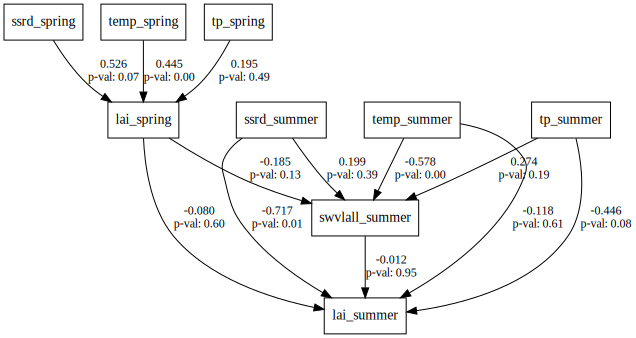

In [9]:
sm.semplot(model, f"images/sem_fit_{lat_lon_list[1][0]}_lon_{lat_lon_list[1][1]}.png")

In [10]:
model.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,lai_spring,~,tp_spring,0.194934,0.282124,0.690950,0.489597
1,lai_spring,~,ssrd_spring,0.525683,0.289181,1.817833,0.069090
2,lai_spring,~,temp_spring,0.444888,0.130436,3.410769,0.000648
3,swvlall_summer,~,lai_spring,-0.185428,0.121919,-1.520915,0.128281
4,swvlall_summer,~,ssrd_summer,0.198734,0.230139,0.863537,0.387842
5,swvlall_summer,~,temp_summer,-0.578276,0.170314,-3.395360,0.000685
6,swvlall_summer,~,tp_summer,0.273731,0.207806,1.317241,0.187758
7,lai_summer,~,swvlall_summer,-0.011941,0.194748,-0.061315,0.951108
8,lai_summer,~,ssrd_summer,-0.717414,0.278982,-2.571548,0.010124
9,lai_summer,~,temp_summer,-0.117951,0.233426,-0.505304,0.613345


In [11]:
df_pred = df.copy()
df_pred["lai_summer"] = float('nan')

pred_lai_summer = model.predict(df_pred).lai_summer


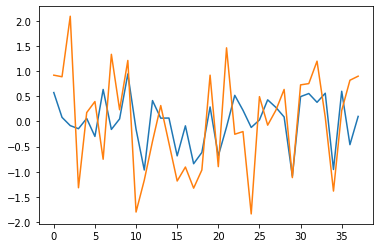

In [12]:
plt.plot(pred_lai_summer.values)
plt.plot(df.lai_summer.values)
